# Actividad de visualización en R  

- Datos de covid en España -> buscando patrones

## Datos de covid por provincias

fuente: https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv

Descripción de los metadatos https://cnecovid.isciii.es/covid19/resources/metadata_diag_ccaa_decl_prov_edad_sexo.pdf
  
Datos:
  
- Provincia_iso (1 o dos letras)
- Sexo (H/M)
- grupo edad (de 10 en 10 años)
- Fecha (yyyy-mm-dd)
- num_casos 
- num_hosp 
- num_uci 
- nun_def

Datos para las gráficas: 

- Fechas de las olas
```
     olas <- c("2020-04-01","2020-08-02","2020-12-01","2021-04-01","2021-07-01","2021-12-01")
     olas <- as.Date(olas)
     olas <- as.POSIXct(olas)
     olas_name <- c("1ª ola","2ª ola","3ª ola","4ª ola","5ª ola","6ª ola")
```
Datos para visualización

- Abreviaturas de nombres de provincia y nombres largos https://raw.githubusercontent.com/montera34/escovid19data/master/data/original/abreviaturas_provincias.csv
- Datos de población por provincia url_provincias_poblacion  https://raw.githubusercontent.com/montera34/escovid19data/master/data/original/provincias-poblacion.csv

In [1]:
if (!"ggrepel" %in% installed.packages()) {install.packages("ggrepel")}         # Para resaltar líneas
if (!"gghighlight" %in% installed.packages()) {install.packages("gghighlight")} # Para resaltar líneas
if (!"viridis" %in% installed.packages()) {install.packages('viridis')}         # Paleta colores
if (!"ggthemes" %in% installed.packages()) {install.packages('ggthemes')}       # Temas
if (!"mapSpain" %in% installed.packages()) {install.packages('mapSpain')}       # Mapas de España
if (!"tmap" %in% installed.packages()) {install.packages('tmap') }              # Dibujar mapas
if (!"cartography" %in% installed.packages()) {install.packages('cartography')} # Dibujar mapas
if (!"zoo" %in% installed.packages()) {install.packages('zoo')}                 # Dibujar mapas

library(tidyverse)
library(lubridate)   # Manejo de fechas
library(scales)      # Fomatar fechas
library(ggrepel)     # textos alineados
library(gghighlight) # Para resaltar líneas
library(viridis)     # Paleta colores
library(ggthemes)    # Temas
library(mapSpain)    # Mapas de España
library(sf)          # Manejo objetos sf
library(tmap)        # Dibujar mapas
library(cartography) # Dibujar mapas
library(zoo)         #calculo de media en una ventana de tiempo

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor


Loading required package: viridisLite


Attaching package: 'viridis'


The following object is masked from 'package:scales':

    viridis_pal


Linking to GEOS 3.9.1, GDAL 3.2.1, PROJ 7.2.1; sf_use_s2() is TRUE

This project is in maintenance mode. 
Core functionalities of `cartography` can be found in `mapsf`.
http

### Plantilla de gráficas 

In [2]:
theme_a <- function(base_size = 10,
                    base_family = "sans"
                           )
    {
 
    tema <-
        theme_bw(base_size=base_size) +
          
        theme(legend.position="right") +
        theme(legend.text = element_text(size=base_size+1,family = base_family)) +
        theme(plot.title=element_text(size=base_size+3, 
                                      face = "bold",
                                      vjust=1.25, 
                                      family=base_family, 
                                      hjust = 0.5
                                      )) +
        
        theme(plot.subtitle=element_text(size=base_size+2, family = base_family,  hjust = 0.5))  +
        theme(text = element_text(size=base_size+2,family = base_family)) +
        theme(axis.text.x=element_text(size=base_size+1,family = base_family)) +
        theme(axis.text.y=element_text(size=base_size+1, family = base_family)) +
          
        theme(axis.title.x=element_text(size=base_size+2, vjust=0, family = base_family)) +
        theme(axis.title.y=element_text(size=base_size+2, vjust=1.25, family = base_family)) +
        theme(plot.caption=element_text(size=base_size, family = base_family)) +
        theme(strip.text = element_text(size=base_size, family = base_family)) +
        theme(strip.text.x = element_text(size=base_size, family = base_family)) +
        theme(strip.text.y = element_text(size=base_size, family = base_family)) +
        theme(plot.caption = element_text(hjust = 1))+
        theme(panel.grid.major = element_blank(),
              panel.grid.minor = element_blank())
 
    return (tema)
}

### Lectura de datos

In [3]:
locale(date_names = "es", date_format = "%AD", time_format = "%AT",
  decimal_mark = ",", grouping_mark = ".", tz = "UTC",
  encoding = "UTF-8", asciify = FALSE)

url_covid_isciii <- "https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv" 
covid_isciii <- read_csv (url_covid_isciii) %>%
                mutate (provincia_iso = 
                       ifelse (is.na (provincia_iso), "NV", provincia_iso)) # por el problena de que NA (de Navarra) lo considera valor vacío
  

print (covid_isciii)

<locale>
Numbers:  123.456,78
Formats:  %AD / %AT
Timezone: UTC
Encoding: UTF-8
<date_names>
Days:   domingo (dom.), lunes (lun.), martes (mar.), miércoles (mié.), jueves
        (jue.), viernes (vie.), sábado (sáb.)
Months: enero (ene.), febrero (feb.), marzo (mar.), abril (abr.), mayo (may.),
        junio (jun.), julio (jul.), agosto (ago.), septiembre (sept.),
        octubre (oct.), noviembre (nov.), diciembre (dic.)
AM/PM:  a. m./p. m.

Rows: 1302210 Columns: 8

-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (3): provincia_iso, sexo, grupo_edad
dbl  (4): num_casos, num_hosp, num_uci, num_def
date (1): fecha


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 1,302,210 x 8
   provincia_iso sexo  grupo_edad fecha      num_casos num_hosp num_uci num_def
   <chr>         <chr> <chr>      <date>         <dbl>    <dbl>   <dbl>   <dbl>
 1 A             H     0-9        2020-01-01         0        0       0       0
 2 A             H     10-19      2020-01-01         0        0       0       0
 3 A             H     20-29      2020-01-01         0        0       0       0
 4 A             H     30-39      2020-01-01         0        0       0       0
 5 A             H     40-49      2020-01-01         0        0       0       0
 6 A             H     50-59      2020-01-01         0        0       0       0
 7 A             H     60-69      2020-01-01         0        0       0       0
 8 A             H     70-79      2020-01-01         0        0       0       0
 9 A             H     80+        2020-01-01         0        0       0       0
10 A             H     NC         2020-01-01         0        0       0       0
# ... with 1,3

### Preparar datos para la visualización

#### Añadir los nombres largos de provincias para mayor claridad

  Recursos en https://raw.githubusercontent.com/montera34/escovid19data/master/data/original/abreviaturas_provincias.csv

In [4]:
# recurso de traducción de nombre corto de provincia a largo formato INE

url_provincias_abreviatura <- "https://raw.githubusercontent.com/montera34/escovid19data/master/data/original/abreviaturas_provincias.csv"

provincias_abreviatura <- read_csv( url_provincias_abreviatura)
print (provincias_abreviatura)

Rows: 52 Columns: 3

-- Column specification --------------------------------------------------------
Delimiter: ","
chr (3): codigo, provincia, abreviatura


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 52 x 3
   codigo provincia        abreviatura
   <chr>  <chr>            <chr>      
 1 01     Araba/Álava      VI         
 2 02     Albacete         AB         
 3 03     Alicante/Alacant A          
 4 04     Almería          AL         
 5 05     Ávila            AV         
 6 06     Badajoz          BA         
 7 07     Balears, Illes   PM         
 8 08     Barcelona        B          
 9 09     Burgos           BU         
10 10     Cáceres          CC         
# ... with 42 more rows


In [5]:
# Traducción del nombre corto por el largo formato INE

# recurso de traducción de nombre corto de provincia a largo formato INE

covid_provincias <- left_join (covid_isciii, provincias_abreviatura, by = c("provincia_iso" =  "abreviatura")) 

print (covid_provincias)


# A tibble: 1,302,210 x 10
   provincia_iso sexo  grupo_edad fecha      num_casos num_hosp num_uci num_def
   <chr>         <chr> <chr>      <date>         <dbl>    <dbl>   <dbl>   <dbl>
 1 A             H     0-9        2020-01-01         0        0       0       0
 2 A             H     10-19      2020-01-01         0        0       0       0
 3 A             H     20-29      2020-01-01         0        0       0       0
 4 A             H     30-39      2020-01-01         0        0       0       0
 5 A             H     40-49      2020-01-01         0        0       0       0
 6 A             H     50-59      2020-01-01         0        0       0       0
 7 A             H     60-69      2020-01-01         0        0       0       0
 8 A             H     70-79      2020-01-01         0        0       0       0
 9 A             H     80+        2020-01-01         0        0       0       0
10 A             H     NC         2020-01-01         0        0       0       0
# ... with 1,

#### Añadir población

In [7]:
# recurso de población por provincia
 

url_provincias_poblacion <- "https://raw.githubusercontent.com/montera34/escovid19data/master/data/original/provincias-poblacion.csv"

provincias_poblacion <- read_csv( url_provincias_poblacion)
print (provincias_poblacion)

Rows: 52 Columns: 3

-- Column specification --------------------------------------------------------
Delimiter: ","
chr (2): ine_code, provincia
dbl (1): poblacion


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 52 x 3
   ine_code provincia        poblacion
   <chr>    <chr>                <dbl>
 1 02       Albacete            388167
 2 03       Alicante/Alacant   1858683
 3 04       Almería             716820
 4 01       Araba/Álava         331549
 5 33       Asturias           1022800
 6 05       Ávila               157640
 7 06       Badajoz             673559
 8 07       Balears, Illes     1149460
 9 08       Barcelona          5664579
10 48       Bizkaia            1152651
# ... with 42 more rows


#### Limpiando datos

In [9]:
# Filtramos los últimos cuatro días por no ser datos consolidados
# Quitamos datos nulos


covid_provincias_poblacion <- covid_provincias_poblacion %>%
                    filter (fecha < max(fecha) - 4 )  %>%  #quitamos los 4 últimos días por no estar consolidados
                    filter (grupo_edad != "NC") %>%
                    filter (sexo != "NC") %>%
                    filter (provincia_iso != "NC") #quitamos valores nulos

orden_edad <- c("0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80+")
covid_provincias$grupo_edad  <-  fct_rev (factor (covid_provincias$grupo_edad, orden_edad))

print (covid_provincias_poblacion)

# A tibble: 761,904 x 12
   provincia_iso sexo  grupo_edad fecha      num_casos num_hosp num_uci num_def
   <chr>         <chr> <chr>      <date>         <dbl>    <dbl>   <dbl>   <dbl>
 1 A             H     0-9        2020-01-01         0        0       0       0
 2 A             H     10-19      2020-01-01         0        0       0       0
 3 A             H     20-29      2020-01-01         0        0       0       0
 4 A             H     30-39      2020-01-01         0        0       0       0
 5 A             H     40-49      2020-01-01         0        0       0       0
 6 A             H     50-59      2020-01-01         0        0       0       0
 7 A             H     60-69      2020-01-01         0        0       0       0
 8 A             H     70-79      2020-01-01         0        0       0       0
 9 A             H     80+        2020-01-01         0        0       0       0
10 A             M     0-9        2020-01-01         0        0       0       0
# ... with 761,

#### Fechas varias

In [10]:
olas <- c("2020-03-11","2020-08-02","2020-12-01","2021-04-01","2021-07-01","2021-12-01")
olas <- as.Date(olas)
olas_name <- c("1ª ola","2ª ola","3ª ola","4ª ola","5ª ola","6ª ola")

min_fecha = min (covid_provincias_poblacion$fecha)
max_fecha = max (covid_provincias_poblacion$fecha)

fechas_visibles <- (seq (min_fecha,max_fecha, by = "3 months") )

### Evolución de los hospitalizaciones de covid por edad

Generar tres vistas diferentes de line chart con la evolución del covid por edad mostrando las distintas olas


- Elegir un formato de fecha adecuado
- Señalar las olas

ayuda para pintar líneas divisorias por olas
  geom_vline(xintercept = as.Date(olas), linetype="dashed", 
                color = "grey", size=1) +
                
El texto de la ola corre de vuestra cuenta. Se puede usar geom_text, geom_text_repel o annotate 

In [11]:
# Ayuda de datos

df <- covid_provincias_poblacion  %>%
      group_by(fecha,grupo_edad) %>%
      summarise(total = sum (num_hosp), # agregamos por provincia y sexo
                .groups ="drop") %>% 
      ungroup ()

#### Visualización 1

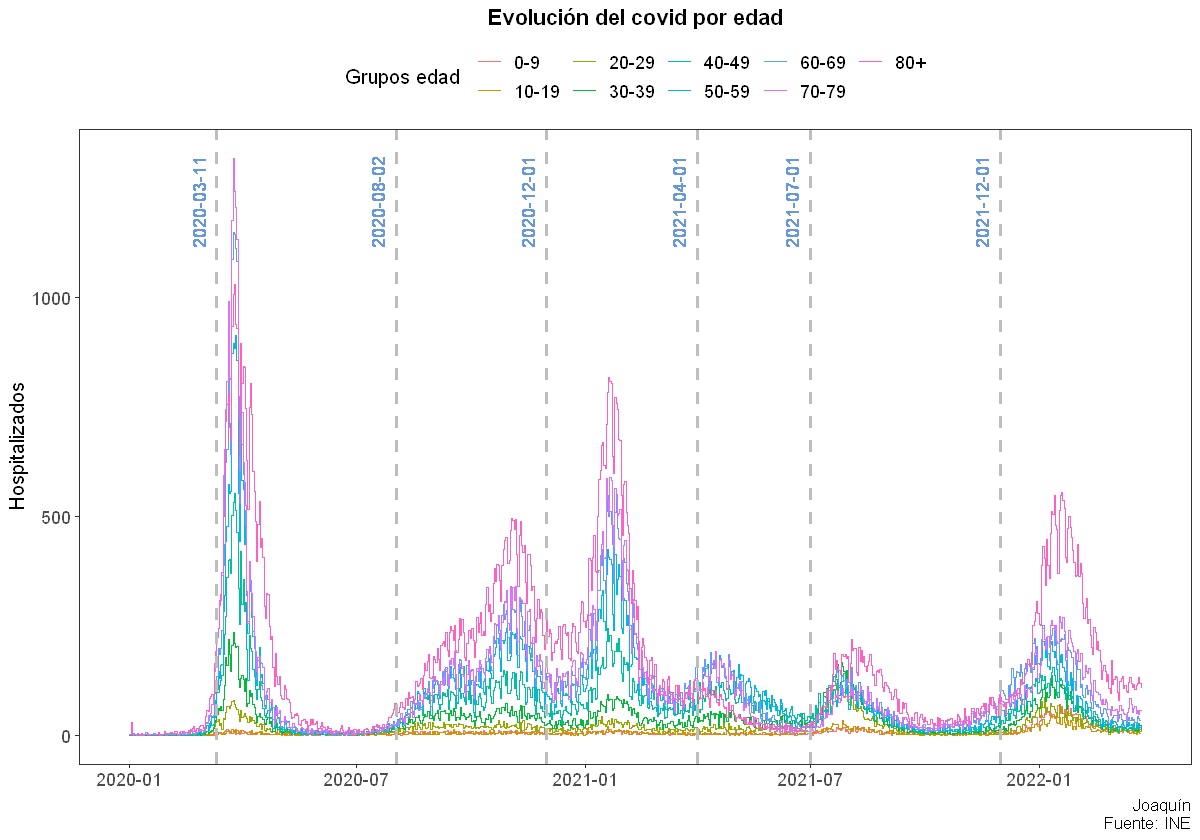

In [92]:
options(repr.plot.width = 10, repr.plot.height = 7)
angle <- 90
color <- "#6797DD"

ggplot(df, aes(x = fecha, y = total, color = grupo_edad)) +
  geom_step(size = 0.5) +
  geom_vline(xintercept = as.Date(olas), linetype = "dashed",
             color = "grey", size = 1) +
  geom_text(aes(x = olas[1]-15, label = olas[1], y=max(total)-100), colour=color, angle=angle) +
  geom_text(aes(x = olas[2]-15, label = olas[2], y=max(total)-100), colour=color, angle=angle) +
  geom_text(aes(x = olas[3]-15, label = olas[3], y=max(total)-100), colour=color, angle=angle) +
  geom_text(aes(x = olas[4]-15, label = olas[4], y=max(total)-100), colour=color, angle=angle) +
  geom_text(aes(x = olas[5]-15, label = olas[5], y=max(total)-100), colour=color, angle=angle) +
  geom_text(aes(x = olas[6]-15, label = olas[6], y=max(total)-100), colour=color, angle=angle) +
labs(y = "Hospitalizados",
       title = "Evolución del covid por edad",
       caption = "Joaquín\nFuente: INE",
       color = "Grupos edad") +
  theme_a() +
  theme(legend.position = "top",
        axis.title.x = element_blank())

#### Visualización 2

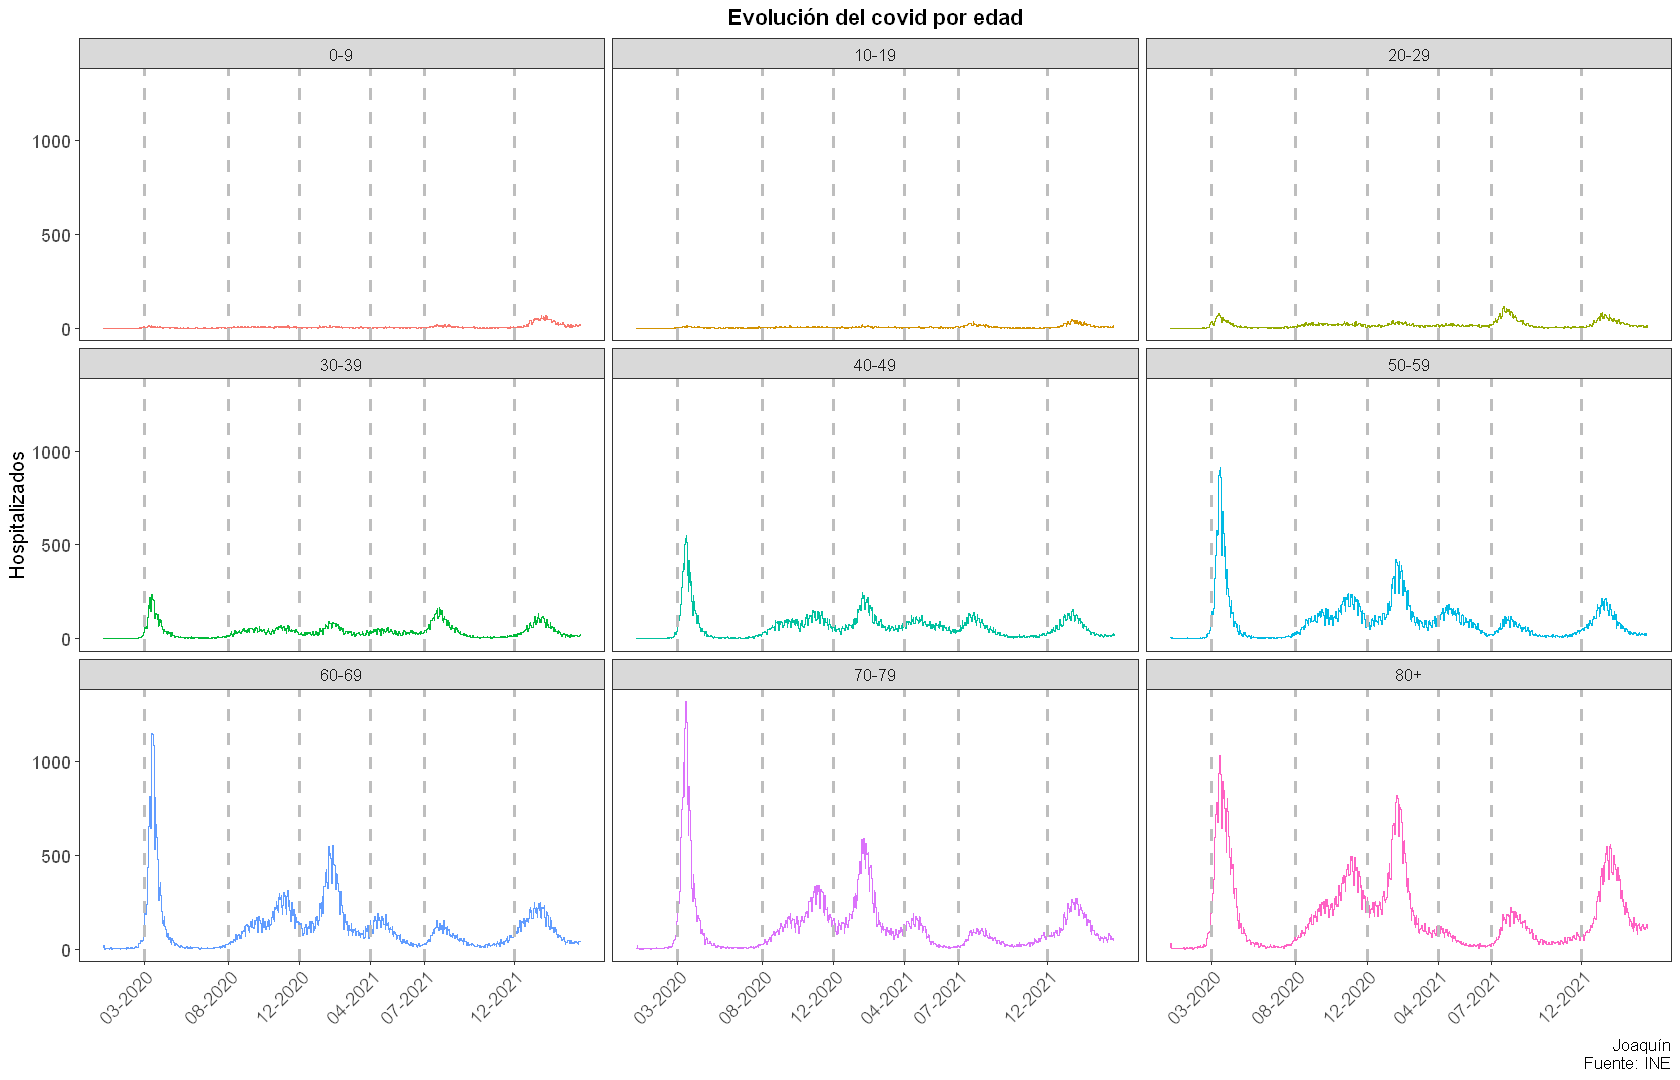

In [93]:
options(repr.plot.width=14, repr.plot.height=9)

angle <- 90
color <- "#6797DD"

ggplot() +
  geom_step(data = df, aes(x = fecha, y = total, color = grupo_edad)) +
  geom_vline(xintercept = as.Date(olas), linetype = "dashed",
             color = "grey", size = 1) +
  scale_x_date (breaks = olas,
                labels = date_format("%m-%Y")) +  #Ajustamos las etiquetas del eje
  labs(y = "Hospitalizados",
       title = "Evolución del covid por edad",
       caption = "Joaquín\nFuente: INE",
       color = "Grupos edad") +
  guides(color = "none") +
  facet_wrap(~ grupo_edad) +
  theme_a() +
  theme(axis.title.x = element_blank(),
        axis.text.x = element_text(angle = 45, hjust = 1))

#### Visualización 3

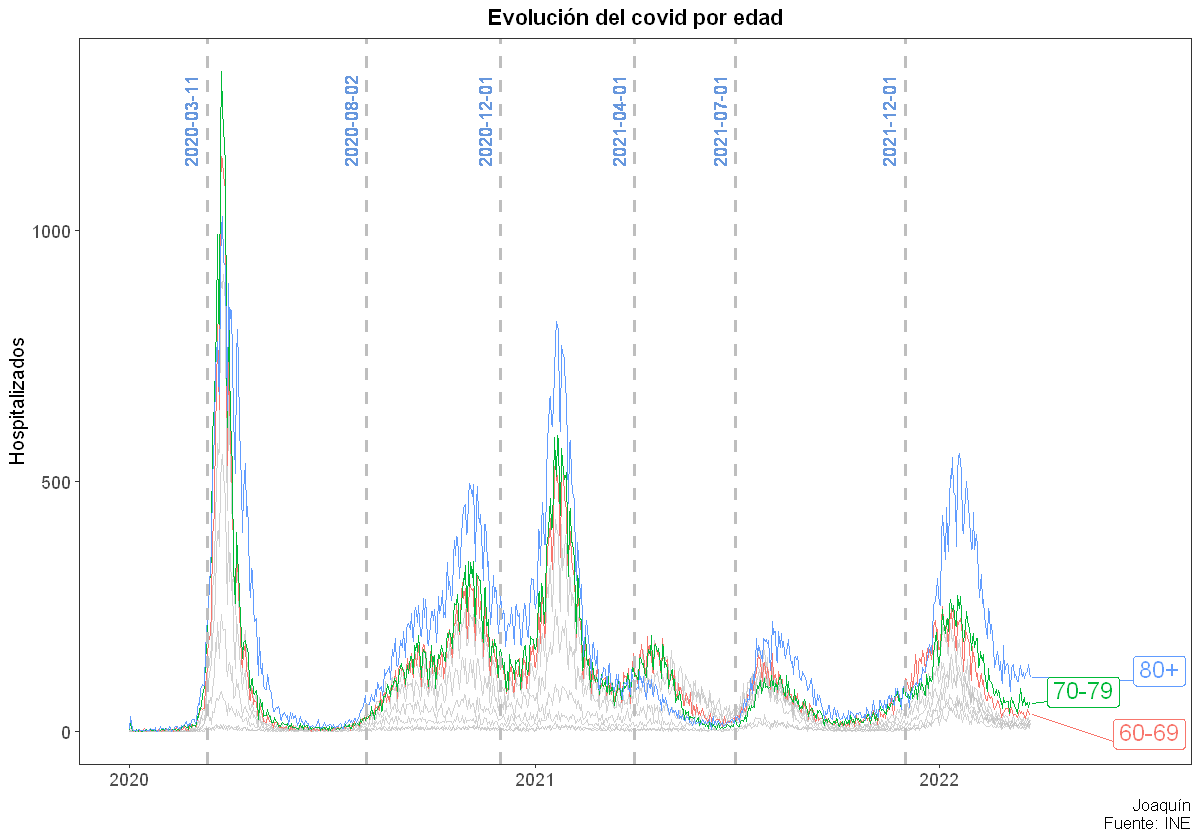

In [94]:
options(repr.plot.width = 10, repr.plot.height = 7)

ggplot(data = df, aes(x = fecha, y = total, color=grupo_edad)) +
  geom_line () +
  gghighlight(max(total) > 1000,
              label_key = grupo_edad,
              label_params = c( size =5, vjust =1,nudge_x = 600,max.overlaps=10)) +
  geom_vline(xintercept = as.Date(olas), linetype = "dashed",
             color = "grey", size = 1) +
  geom_text(aes(x = olas[1]-15, label = olas[1], y=max(total)-100), colour=color, angle=angle) +
  geom_text(aes(x = olas[2]-15, label = olas[2], y=max(total)-100), colour=color, angle=angle) +
  geom_text(aes(x = olas[3]-15, label = olas[3], y=max(total)-100), colour=color, angle=angle) +
  geom_text(aes(x = olas[4]-15, label = olas[4], y=max(total)-100), colour=color, angle=angle) +
  geom_text(aes(x = olas[5]-15, label = olas[5], y=max(total)-100), colour=color, angle=angle) +
  geom_text(aes(x = olas[6]-15, label = olas[6], y=max(total)-100), colour=color, angle=angle) +
  scale_x_date (limits= c(min_fecha, max_fecha+(100))) +  # Alargamos el eje x
  labs(y = "Hospitalizados",
       title = "Evolución del covid por edad",
       caption = "Joaquín\nFuente: INE",
       color = "Grupos edad") +
  guides(color = "none") +
  theme_a() +
  theme(axis.title.x = element_blank())

### Mapa de calor de hospitalizados por edad

- Para que el ancho de la tabla sea razonable representamos los valores medios por semana
- En el eje X aparecerá el tiempo y en el eje y los grupos de edad ordenados por edad
- No pondremos textos porque son muy grandes los números y muy pequeñas las casillas
- Espaciar y formatear la fecha para que se vea el año y el mes sin que quede apelmazado
- Señalar verticalmente las olas y con su texto correspondiente

In [95]:
# Ayuda de datos

df2 <- covid_provincias_poblacion  %>%
      group_by(fecha,grupo_edad) %>%
      summarise(total = sum (num_hosp), # agregamos por provincia y sexo
                .groups ="drop") %>% 
      mutate (fecha_semana = round_date(fecha, "1 weeks")) %>%
      group_by(fecha_semana,grupo_edad) %>%
      summarise(media_semanal = mean (total), # hacemos la media por semana
                # agregamos por edad y sexo
                .groups ="drop") %>% 
      ungroup ()

#### Visualización 1

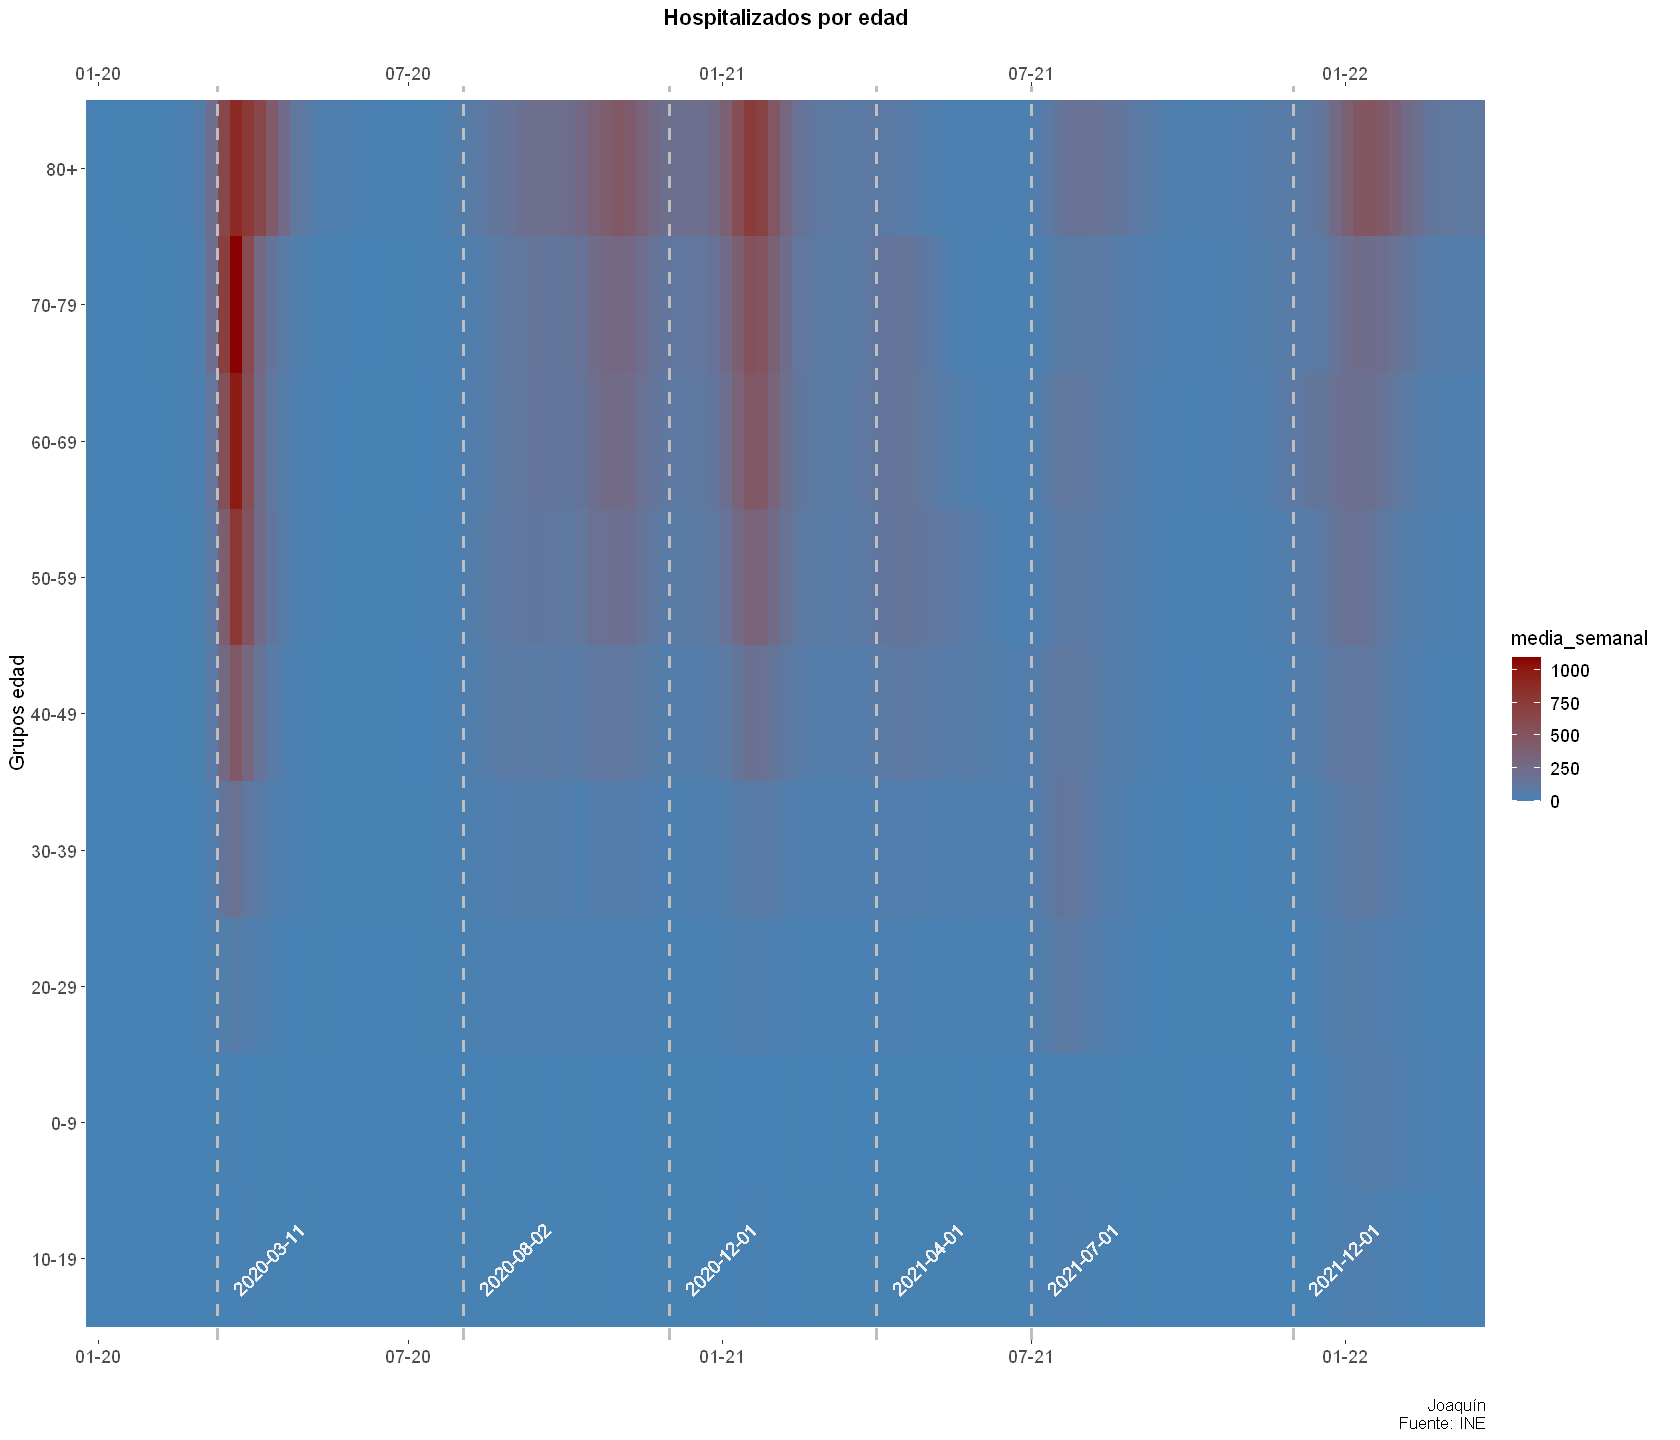

In [96]:
options(repr.plot.width=14, repr.plot.height=12)

color <- "#f1f1f1"
angle <- 45

ggplot(data = df2, aes(x = as.Date(fecha_semana), y = reorder(grupo_edad,(media_semanal)), fill=media_semanal)) +
  geom_tile()+
  scale_fill_gradient(low = "steelblue", high = "red4")+
  geom_vline(xintercept = as.Date(olas), linetype = "dashed",
             color = "grey", size = 1) +
  geom_text(aes(x = olas[1]+30, label = olas[1], y=1), colour=color, angle=angle) +
  geom_text(aes(x = olas[2]+30, label = olas[2], y=1), colour=color, angle=angle) +
  geom_text(aes(x = olas[3]+30, label = olas[3], y=1), colour=color, angle=angle) +
  geom_text(aes(x = olas[4]+30, label = olas[4], y=1), colour=color, angle=angle) +
  geom_text(aes(x = olas[5]+30, label = olas[5], y=1), colour=color, angle=angle) +
  geom_text(aes(x = olas[6]+30, label = olas[6], y=1), colour=color, angle=angle) +
  scale_x_date(
               date_labels = "%m-%y",
               expand =  c(0,1),
               sec.axis = dup_axis()) + #uso de doble eje
  labs(x = "",
       y = "Grupos edad",
       title = "Hospitalizados por edad",
       caption = "Joaquín\nFuente: INE") + 
  theme_a() +
  theme (
        panel.border = element_blank(),
        panel.background = element_blank())

### Variación de la hospitalización  entre el pico de la primera ola y el de la sexta por edad


Generar dos vistas diferentes

- Pico primera ola: 2020-03-24
- Pico sexta ola: 2022-01-13

In [170]:
#Ayuda de datos


#datos a lo largo

df3 <- covid_provincias_poblacion %>%
       filter (fecha == "2020-03-24" |
               fecha == "2022-01-13") %>%
       mutate (fecha = as.character(fecha ))%>% # hacemos que la fecha sea un valor discreto
       group_by(fecha,grupo_edad) %>%
       summarise(total = sum (num_hosp), # agregamos por provincia y sexo
                .groups ="drop") 
  
  

#datos a lo ancho 
  
df4 <- df3 %>% 
      pivot_wider (names_from = fecha,values_from = total) %>%
      mutate (diff = `2022-01-13` - `2020-03-24`) %>%
      mutate ( ajuste_num_1 = ifelse(diff > 0, 1.75,-0.75),
               ajuste_num_2 = ifelse(diff > 0, -0.75,1.75))

#### Visualización 1

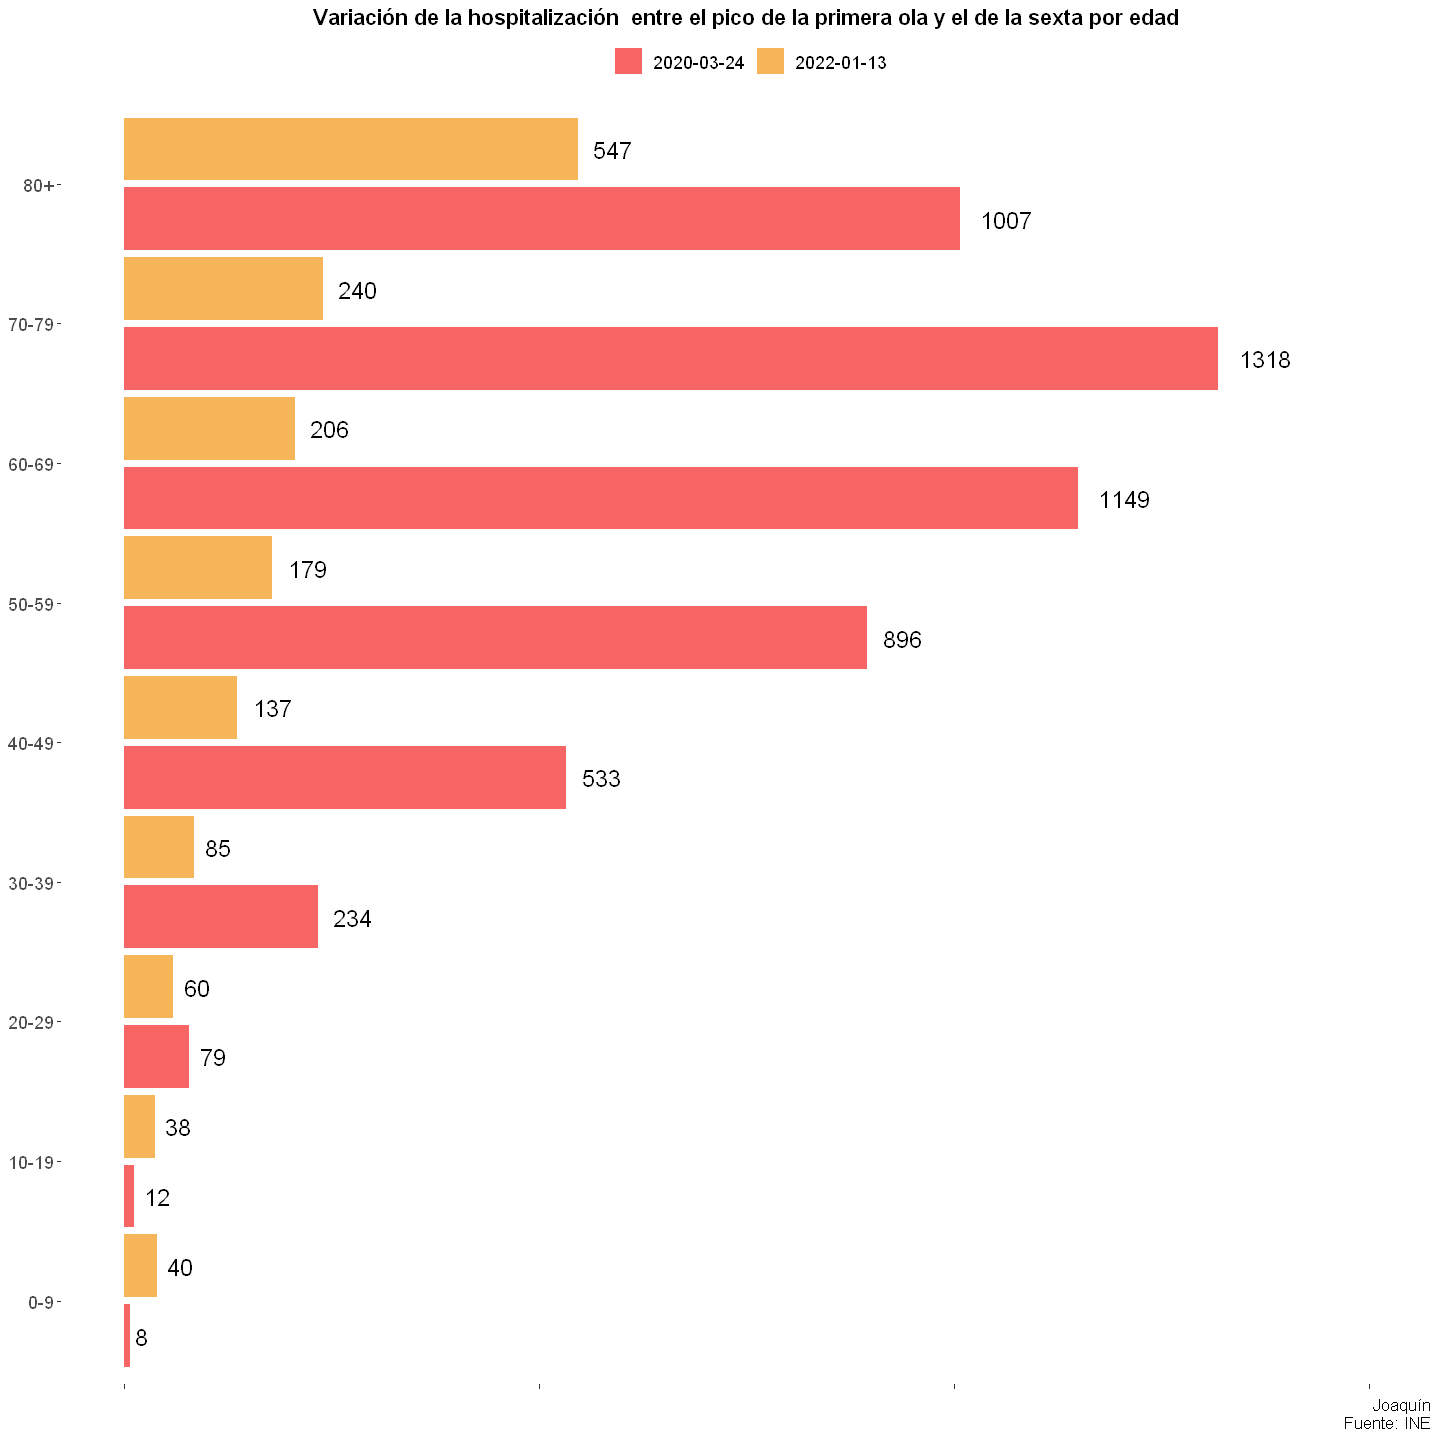

In [144]:
options(repr.plot.width=12, repr.plot.height=12)

ggplot(df3, aes( x=total,y=grupo_edad,fill= fecha)) + 
  geom_col ( position = position_dodge(width = 1)) +
  geom_text(aes(label = total), 
            position = position_dodge(width = 1), 
            size = 5,
            hjust = -0.4) +
  scale_fill_manual(name = "", values = c("#F76565", "#F5B558"))+
  scale_x_continuous (limit = c(0,1500))+
  labs(title = "Variación de la hospitalización entre el pico de la primera ola y el de la sexta por edad",
       caption = "Joaquín\nFuente: INE")+
  theme_a() +
  theme (legend.position="top",
       axis.title.y=element_blank(),
       axis.title.x=element_blank(),
       axis.text.x=element_blank(),
       panel.border = element_blank(),
       panel.grid.major=element_blank(),
       panel.grid.minor=element_blank())

#### Visualización 2

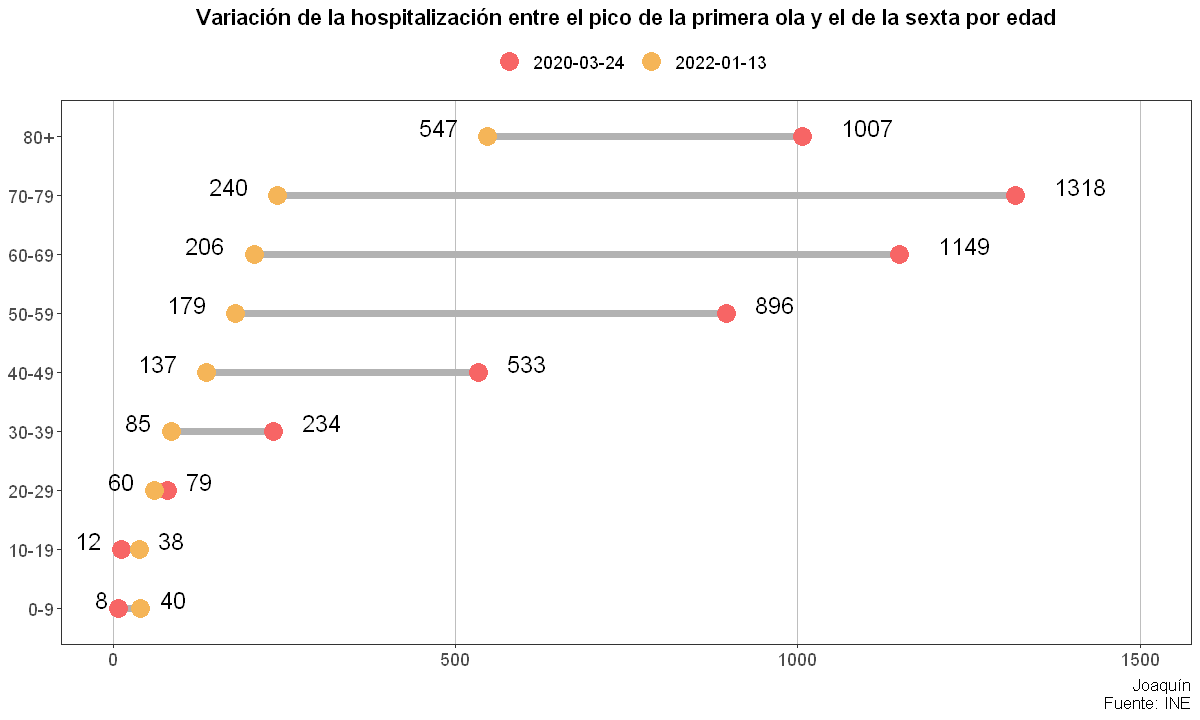

In [339]:
ggplot(df4, aes(y=grupo_edad)) + 
  geom_segment(aes(x=`2020-03-24`, 
                 xend=`2022-01-13`, 
                 y=grupo_edad, 
                 yend=grupo_edad),
                 color="#b2b2b2", size=2)+
  geom_point(aes(x=`2020-03-24`, 
               color = "2020-03-24"),
               size=5)+ 
  geom_point(aes(x=`2022-01-13`, 
               color = "2022-01-13"), 
               size=5)+ 
  geom_text(aes(x=`2020-03-24`, 
              label = `2020-03-24`,
              hjust=  ajuste_num_1),
              size = 5,
              vjust=0, show.legend = FALSE ) +
  geom_text(aes(x=`2022-01-13`, 
              label = `2022-01-13`,
              hjust= ajuste_num_2),
              size = 5,
              vjust=0, show.legend = FALSE ) +           
  scale_color_manual(name = "", values =c("#F76565", "#F5B558") )+
  scale_x_continuous (limit = c(0,1500))+
  labs(title = "Variación de la hospitalización entre el pico de la primera ola y el de la sexta por edad",
     caption = "Joaquín\nFuente: INE")+
  theme_a() +
  theme (legend.position="top",
         axis.title.y=element_blank(),
         axis.title.x=element_blank(),
         panel.grid.major.y = element_blank(),
         panel.grid.major.x = element_line(colour = "gray")) 

### Distribución de la hospitalización del grupo de mayores de 50 años por género

#### Visualización 1


- Dibujar un boxplot con la distribución de la hospitalización por edades mayores  de 50
- Compararlo por sexo

In [173]:
#Ayuda de datos


df5 <- covid_provincias_poblacion %>%
       filter (grupo_edad == "50-59" |
               grupo_edad == "60-69" |
               grupo_edad == "70-79" |  
               grupo_edad == "80+") %>% 
       group_by(fecha,grupo_edad,sexo) %>%
       summarise(total = sum (num_hosp), # agregamos por provincia y sexo
                .groups ="drop") 

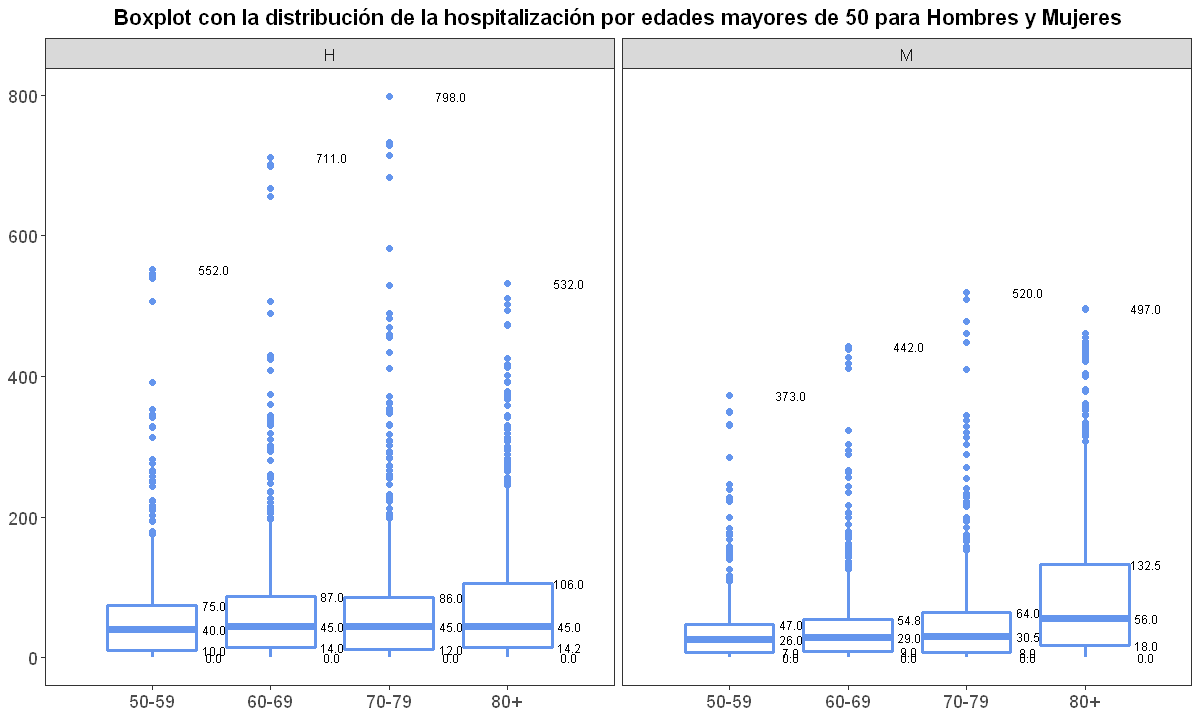

In [337]:
options(repr.plot.width=10, repr.plot.height=6)

ggplot(df5, aes(x = grupo_edad, y = total, group=grupo_edad )) + 
  geom_boxplot(color = 'cornflowerblue', size = 1)  +
  stat_summary(geom="text", fun=quantile,
               aes(label=sprintf("%1.1f", ..y..)), 
               position=position_nudge(x=0.52), size=2.5) +
  facet_wrap(~ sexo)+
  scale_x_discrete(expand = expansion(add = 0.9))+
  labs(x = "Edad", y = "Tasa de paro",
       title = "Boxplot con la distribución de la hospitalización por edades mayores de 50 para Hombres y Mujeres")+
  guides(color = "none")+
  theme_a() +
  theme (axis.title.y=element_blank(),
         axis.title.x=element_blank()) 

### Pirámide de edad de hospitalizaciones por sexo

#### Visualización 1

- Dibujar una pirámide de edad de hospitalizaciones  y colorearla por sexo

In [238]:
#Ayuda de datos

df6 <- covid_provincias_poblacion %>%
       group_by(grupo_edad,sexo) %>%
       summarise(total = sum (num_hosp), # agregamos por provincia y sexo
                .groups ="drop")  %>%
       mutate (separa_sexo = ifelse (sexo == "H", total *-1,total))

In [267]:
head(df6)

grupo_edad,sexo,total,separa_sexo
<chr>,<chr>,<dbl>,<dbl>
0-9,H,3271,-3271
0-9,M,2559,2559
10-19,H,2326,-2326
10-19,M,2572,2572
20-29,H,6474,-6474
20-29,M,8637,8637


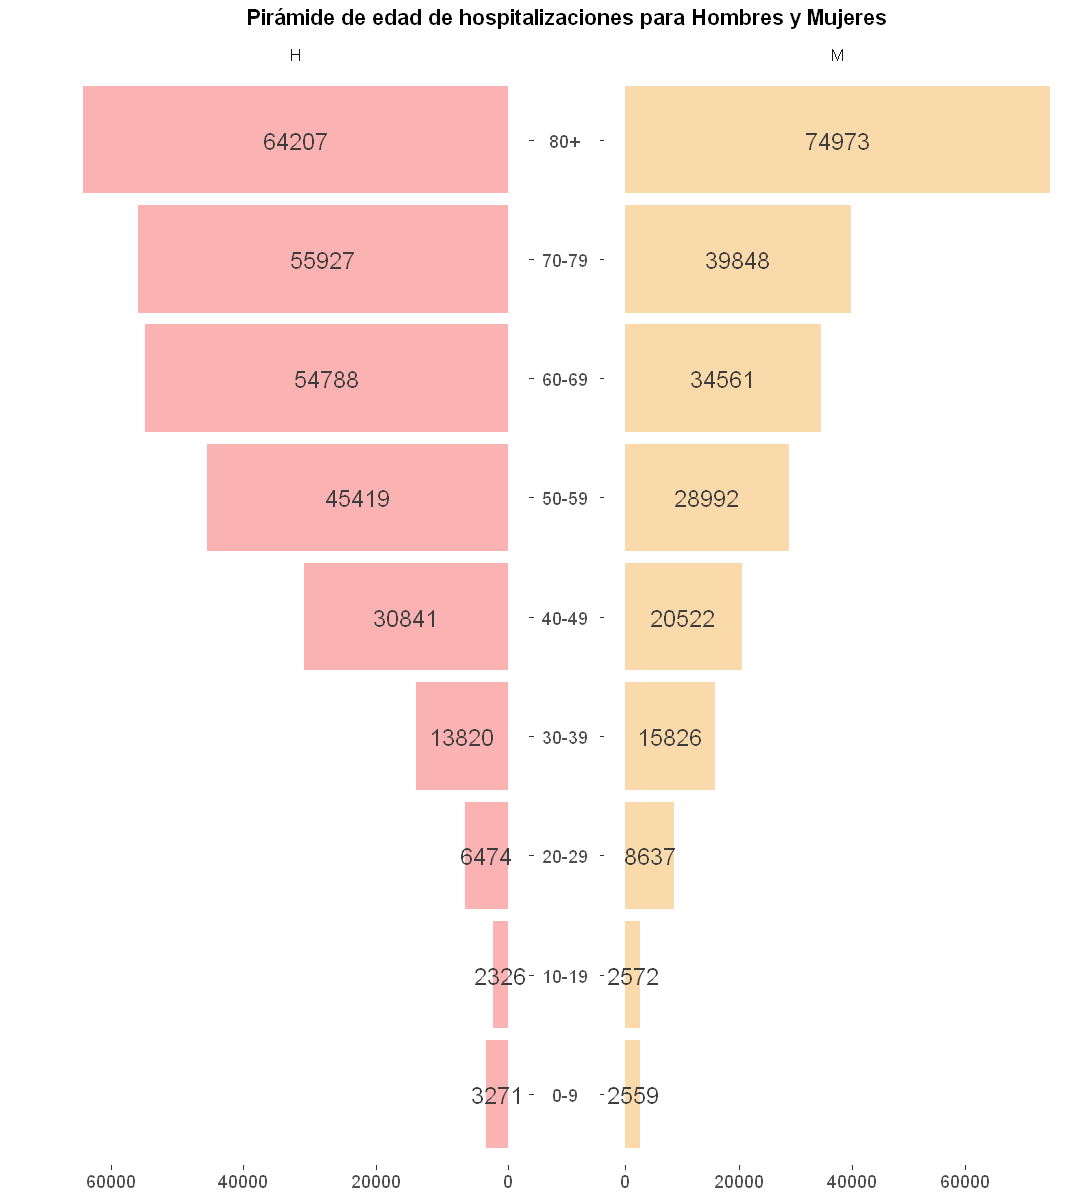

In [336]:
options(repr.plot.width=9, repr.plot.height=10)

if (!"ggpol" %in% installed.packages()) {install.packages("ggpol")}
library(ggpol)

ggplot(df6, aes( x = separa_sexo, y = grupo_edad, fill=sexo )) + 
  geom_col( alpha =0.5, show.legend = FALSE) +
  geom_text(aes(label=total),
            position=position_stack(vjust = 0.5),
            size=5,
            color="#3C3C3C")+
  #scale_x_continuous (labels=abs) +
  #scale_x_continuous (labels=scales::percent_format(scale = 1,accuracy = 1L)) +
  scale_fill_manual(values =c("#F76565", "#F5B558"))+
  facet_share(~sexo, dir = "h", scales = "free", reverse_num = TRUE) +   # note: scales = "free"
  labs(title = "Pirámide de edad de hospitalizaciones para Hombres y Mujeres" )+
  theme_a() +
  theme (
        legend.position = "top",
         panel.border = element_blank(),
         strip.background =element_blank(),
         axis.title.y=element_blank(),
         axis.title.x=element_blank()) 

### Relación entre hospitalizaciones y fallecimientos entre hombres y mujeres

#### Visualización 1

- Hacer una gráfica de doble escala, una escala para los hospitalizados y otra para los fallecidos 
- Compararla por sexo
- Marcar las olas

In [275]:
# Ayuda de datos

df7 <- covid_provincias_poblacion %>%
       group_by(fecha,sexo) %>% # agregamos por provincia y sexo
       summarise(total_hosp = sum (num_hosp), 
                 total_def = sum (num_def),
                .groups ="drop") 

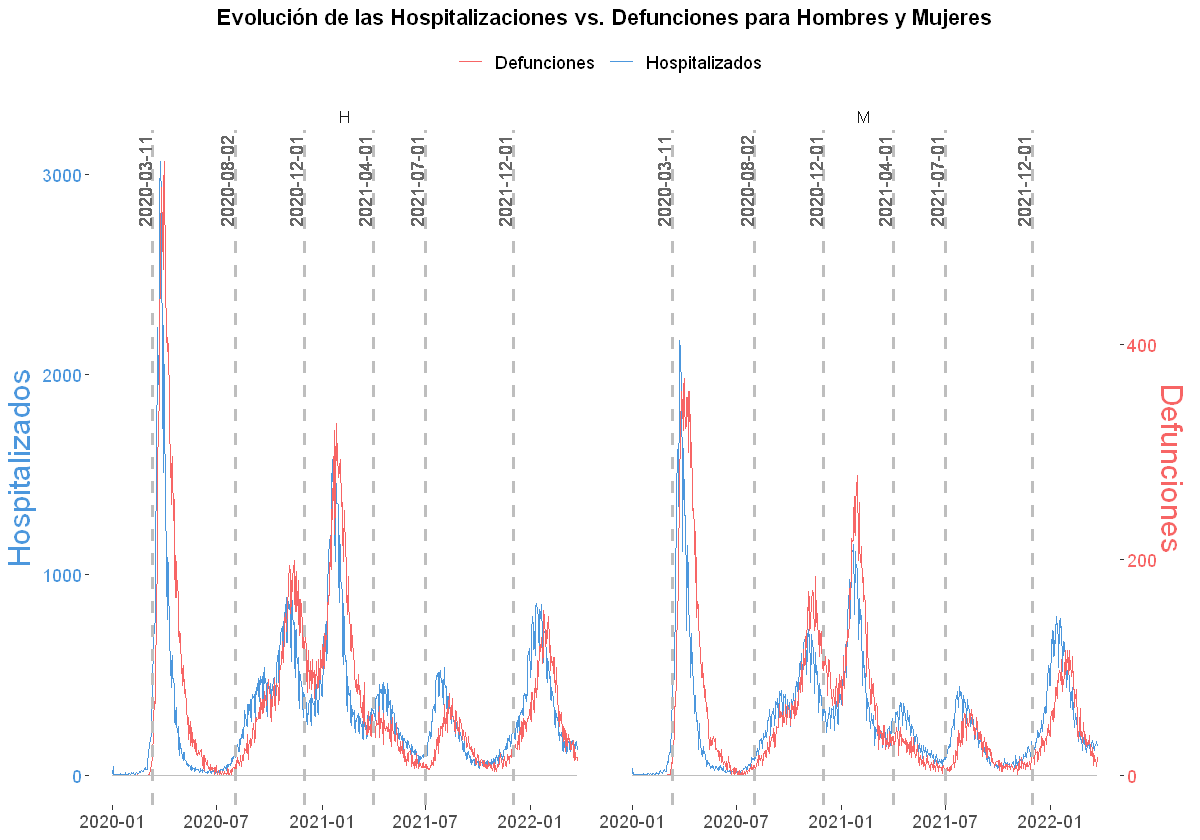

In [334]:
options(repr.plot.width=10, repr.plot.height=7)

max_hosp = max(df7$total_hosp)
max_def =  max(df7$total_def)
escala = max_hosp/max_def

angle <- 90
color <- "#676767"
       
ggplot(df7) +
   geom_line( data= df7, 
              aes(x = fecha, y=total_hosp , color = "Hospitalizados")) +
   geom_line( data = df7,
              aes(x = fecha, y=total_def*escala, color = "Defunciones")) + 
   geom_line( data = df7, aes(x = fecha, y=0), color = "grey") + 
   scale_y_continuous(name = "Hospitalizados",
                         sec.axis = sec_axis(~./escala, name="Defunciones")) + # Divide by 25 
   scale_colour_manual('', values = c('Defunciones'='#F76565', 'Hospitalizados'='#4C97DD')) +
   geom_vline(xintercept = as.Date(olas), linetype = "dashed",
             color = "grey", size = 1) +
  geom_text(aes(x = olas[1]-15, label = olas[1], y=max(total_hosp)-100), colour=color, angle=angle) +
  geom_text(aes(x = olas[2]-15, label = olas[2], y=max(total_hosp)-100), colour=color, angle=angle) +
  geom_text(aes(x = olas[3]-15, label = olas[3], y=max(total_hosp)-100), colour=color, angle=angle) +
  geom_text(aes(x = olas[4]-15, label = olas[4], y=max(total_hosp)-100), colour=color, angle=angle) +
  geom_text(aes(x = olas[5]-15, label = olas[5], y=max(total_hosp)-100), colour=color, angle=angle) +
  geom_text(aes(x = olas[6]-15, label = olas[6], y=max(total_hosp)-100), colour=color, angle=angle) +
  facet_wrap(~ sexo)+
   labs(title = "Evolución de las Hospitalizaciones vs. Defunciones para Hombres y Mujeres",
        x = "")+
   theme_a() +
   theme( legend.position = "top",
          axis.title.y = element_text(color = "#4C97DD", size = 18),
          axis.title.y.right = element_text(color = "#F76565", size = 18),
          axis.text.y = element_text(color = "#4C97DD"),
          axis.text.y.right = element_text(color = "#F76565"),
          axis.title.x = element_blank(),
          panel.border = element_blank(),
          strip.background =element_blank())

#### Visualización 2

- Hacer una scaterplot conectado con los hospitalizados (eje x) y los fallecidos (eje y) para hombres y mujeres
- No incluir etiquetas

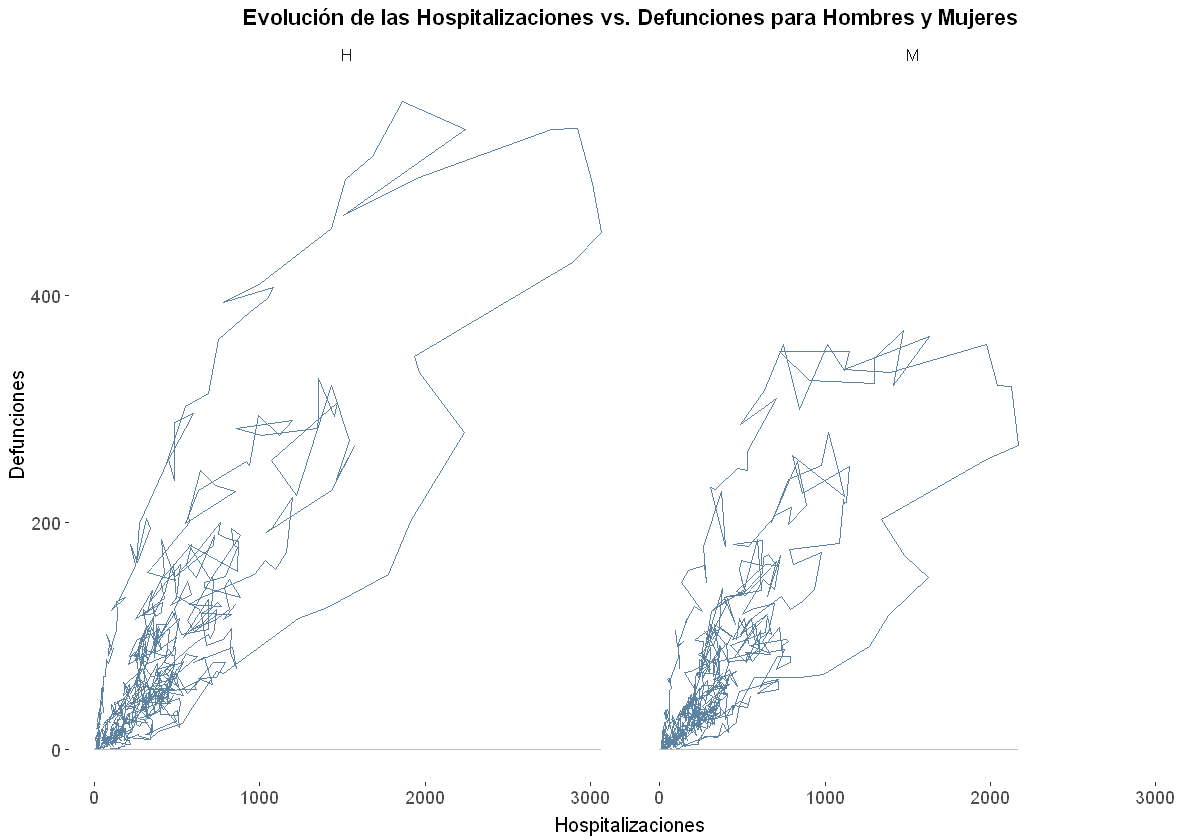

In [330]:
options(repr.plot.width=10, repr.plot.height=7)

ggplot(data = df7, 
      aes(x=total_hosp, y=total_def, color = fecha ))+
  geom_path (color="steelblue4",size=0.5,alpha=0.8)+
  geom_line( aes(x = total_hosp, y=0), color = "grey") + 
  facet_wrap(~ sexo)+
  labs(title = "Evolución de las Hospitalizaciones vs. Defunciones para Hombres y Mujeres",
       x ="Hospitalizaciones", y= "Defunciones") +
  guides(color = "none") +
  theme_a() +
  theme( 
          panel.border = element_blank(),
          strip.background =element_blank())

### Mapa de fallecidos 

Mapa de fallecidos en el día con más defunciones y el mapa con animación de la sexta ola

- Los datos de fallecidos hay que convertirlos a tasa para poder comparar las provincias. Usaremos la tasa de fallecidos por 1 millón
 
Recursos espaciales:

- Librería mapspain para el mapa de provincias: función esp_get_prov_siane()

librerías para dibujar el mapa, a elegir:

- ggplot
- tmap

In [340]:
# Ayuda de datos

# Cálculo del dia con más fallecidos 

max_valor <-  covid_provincias_poblacion %>%
                  group_by (fecha) %>%
                  summarise (tot_def  = sum (num_def),
                             .groups ="drop") %>%
                   ungroup () %>%
                  top_n(n=1, tot_def) # fila con el valor más alto de defunciones
max_fecha_valor <- max_valor$fecha #fecha del valor más alto de fallecidos

# Cáculo de defunciones por 1.000.000 de habitantes
df8 <- covid_provincias_poblacion %>%
       group_by(fecha,provincia) %>%  
       summarise(total_def = (sum (num_def)*1000000)/poblacion, # convertimos  a tasa por 1 millon para comparar provincias
       .groups ="drop") %>%
        distinct(fecha,provincia,total_def) %>%
        arrange (fecha)

#### Mapa de fallecidos del día con el valor más alto de defunciones



- Filtrar por fecha del valor más alto de fallecidos
- Unir con datos espaciales
- Elegir un color que creáis más adecuado
- Indicar las unidades
- Ajustar tamaños de letra 

In [353]:
head(df8)

fecha,provincia,total_def
<date>,<chr>,<dbl>
2020-01-01,Albacete,0
2020-01-01,Alicante/Alacant,0
2020-01-01,Almería,0
2020-01-01,Araba/Álava,0
2020-01-01,Asturias,0
2020-01-01,Ávila,0


In [372]:
if (!"mapSpain" %in% installed.packages()) {install.packages("mapSpain")}
library(mapSpain)
mapSpain_sf <- esp_get_ccaa()
nrow(mapSpain_sf)

url_names_spain_region <- "https://raw.githubusercontent.com/montera34/escovid19data/master/data/original/shapes/spain_regions_utm.csv"

names_spain_region <- read_csv2(url_names_spain_region)
df8 <- left_join  (df8,select(names_spain_region,c(INE_name,ISO_name)), by = c( "provincia" = "INE_name")) 
df8

[1] 19

i Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 19 Columns: 5

-- Column specification --------------------------------------------------------
Delimiter: ";"
chr (3): num_region, INE_name, ISO_name


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



fecha,provincia,total_def,total_big,ISO_name.x,ISO_name.y
<date>,<chr>,<dbl>,<dbl>,<chr>,<chr>
2020-01-01,Albacete,0,0,NA,NA
2020-01-01,Alicante/Alacant,0,0,NA,NA
2020-01-01,Almería,0,0,NA,NA
2020-01-01,Araba/Álava,0,0,NA,NA
2020-01-01,Asturias,0,0,NA,NA
2020-01-01,Ávila,0,0,NA,NA
2020-01-01,Badajoz,0,0,NA,NA
2020-01-01,"Balears, Illes",0,0,Illes Balears,Illes Balears
2020-01-01,Barcelona,0,0,NA,NA


ERROR: Error in FUN(X[[i]], ...): object 'geometry' not found


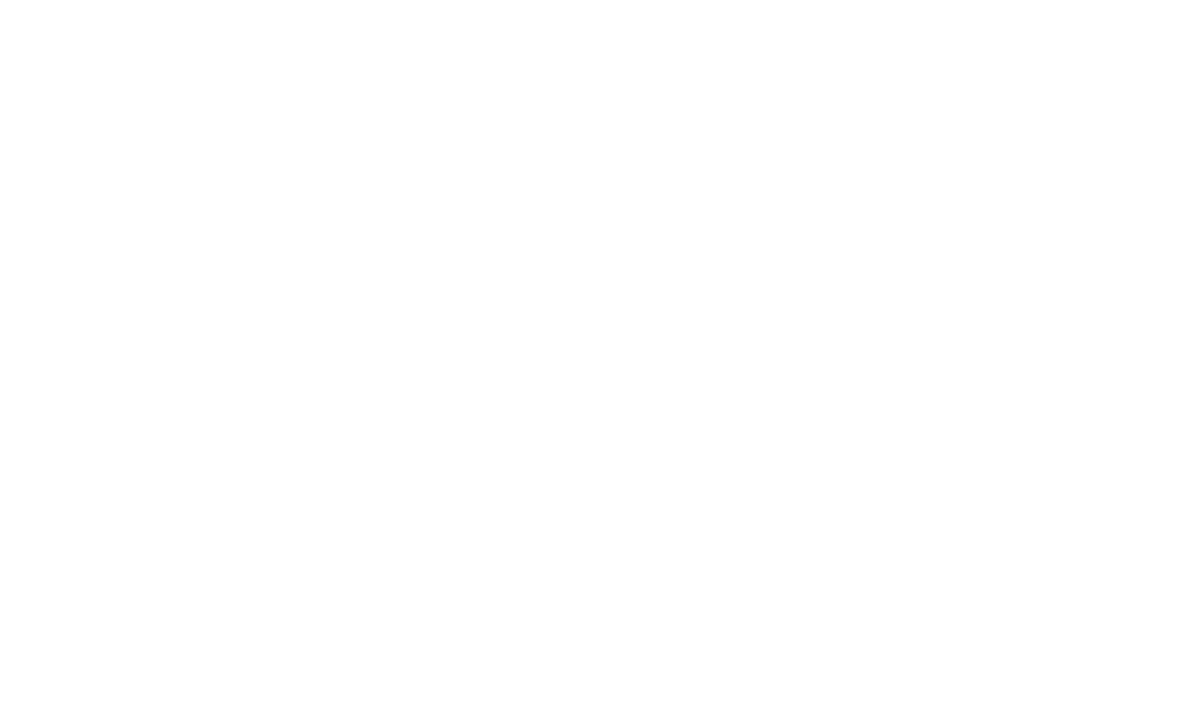

In [373]:
map_es <- 
  ggplot(data = df8 ) +
     geom_sf(aes(geometry = geometry, fill = Total), color ="#6C96A6") + 
     geom_sf_text (aes(label = paste0(round(Total,1),"%")),
                   stat = "sf_coordinates",
                    size = 3) +
    scale_fill_gradient (low = "#E1F9FB",high = "#1882AD",
                        guide = guide_legend()) +
    labs(title = paste ("Tasa del paro a ", max_fecha),
    fill ="% Paro") +
    theme_map() +
    theme(plot.title=element_text(size='14',face="bold"),
          legend.title = element_text(size=11),
          legend.text = element_text(size=10),
          legend.position = c(0.95, 0.25))
          #legend.position = "right")

plot (map_es)

#### Mapa con animación de los fallecidos en la sexta ola

- Filtrar fechas de sexta ola. Empieza en 2021-12-01
- Seleccionar solo los jueves para que no salgan muchos frames ->  filter (wday (fecha )== 5)
- Pintar mapa como en el caso anterior
- Aplicar animación

  - Para ggplot se puede usar la librería gganimate
  - para tmap hay que iterar

In [ ]:
if (!"gganimate" %in% installed.packages()) {install.packages("gganimate")} # Para resaltar líneas
if (!"gifski" %in% installed.packages()) {install.packages("gifski")}
library (gganimate)
library(gifski)